In [78]:
import scipy
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, ifft, fftshift, fftfreq

In [2]:
# Read the clean .wav file
sample_rate, data = wavfile.read('piano_short.wav')

# Read the noisy wav file
sample_rate_noisy, data_noisy = wavfile.read('piano_short_noisy.wav')

In [3]:
# Read channels for first sample
first_channel = data[:, 0]
second_channel = data[:, 1]

# Spectrogram of First sample, First channel
sample_freq_fs_fc, segment_time_fs_fc, spec_data_fs_fc = scipy.signal.spectrogram(first_channel, sample_rate)

# Spectrogram of First sample, Second Channel
sample_freq_fs_sc, segment_time_fs_sc, spec_data_fs_sc = scipy.signal.spectrogram(second_channel, sample_rate)
# Note sample_rate and sampling frequency values are same but theoretically they are different measures

# Read channels for second sample
first_channel_noisy = data_noisy[:, 0]
second_channel_noisy = data_noisy[:, 1]

# First Sample Spectogram and Frequency Analysis

In [20]:
xticks = [i * sample_rate for i in range((len(data) // sample_rate) + 1)]
print(xticks)

[0, 44100, 88200, 132300, 176400, 220500, 264600, 308700, 352800, 396900, 441000, 485100, 529200, 573300, 617400, 661500, 705600, 749700, 793800, 837900, 882000, 926100, 970200, 1014300, 1058400, 1102500, 1146600]


In [24]:
xticks_1 = [i * sample_rate for i in range((len(data) // sample_rate) + 1)]
xticks_2 = [i * sample_rate_noisy for i in range((len(data_noisy) // sample_rate_noisy) + 1)]

In [74]:
helper = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
spec_yticks = [6.28 * i for i in helper]
spec_yticks

[0.0, 15700.0, 31400.0, 47100.0, 62800.0, 78500.0, 94200.0, 109900.0, 125600.0]

In [ ]:
# Amplitudine to dB -> 20lg(amplitudine)
# Hz -> rad/s; 1hz -> 6.28 rad/s
# 

In [47]:
dumb = sample_freq_fs_fc * 6.28
dumb

array([     0.      ,   1081.828125,   2163.65625 ,   3245.484375,
         4327.3125  ,   5409.140625,   6490.96875 ,   7572.796875,
         8654.625   ,   9736.453125,  10818.28125 ,  11900.109375,
        12981.9375  ,  14063.765625,  15145.59375 ,  16227.421875,
        17309.25    ,  18391.078125,  19472.90625 ,  20554.734375,
        21636.5625  ,  22718.390625,  23800.21875 ,  24882.046875,
        25963.875   ,  27045.703125,  28127.53125 ,  29209.359375,
        30291.1875  ,  31373.015625,  32454.84375 ,  33536.671875,
        34618.5     ,  35700.328125,  36782.15625 ,  37863.984375,
        38945.8125  ,  40027.640625,  41109.46875 ,  42191.296875,
        43273.125   ,  44354.953125,  45436.78125 ,  46518.609375,
        47600.4375  ,  48682.265625,  49764.09375 ,  50845.921875,
        51927.75    ,  53009.578125,  54091.40625 ,  55173.234375,
        56255.0625  ,  57336.890625,  58418.71875 ,  59500.546875,
        60582.375   ,  61664.203125,  62746.03125 ,  63827.859

C:\Users\sergi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
C:\Users\sergi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7558: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
C:\Users\sergi\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
C:\Users\sergi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7558: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


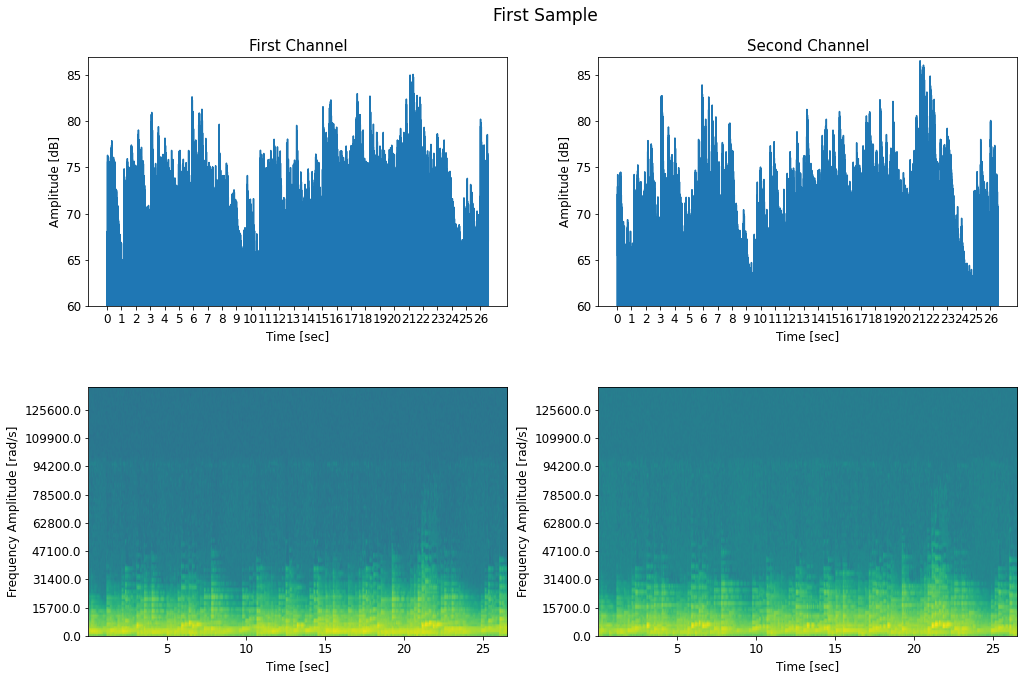

In [77]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
fig.tight_layout(pad=6.0)

fig.suptitle('First Sample', size=17)
ax[0, 0].plot(20*np.log10(np.abs(first_channel)))
ax[0, 0].set_xticks(xticks_1)
ax[0, 0].set_xticklabels(np.arange(0, len(xticks_1), 1))
ax[0, 0].set_xlabel(xlabel='Time [sec]', size=12)
ax[0, 0].set_ylabel(ylabel='Amplitude [dB]', size=12)
ax[0, 0].set_ylim(60, 87)
ax[0, 0].set_title("First Channel", fontsize=15)
ax[0, 0].tick_params(axis='both', which='both', labelsize=12)


ax[1, 0].specgram(first_channel, Fs=sample_rate)
ax[1, 0].set_xlabel(xlabel='Time [sec]', size=12)
ax[1, 0].set_ylabel(ylabel='Frequency Amplitude [rad/s]', size=12)
ax[1, 0].set_yticks(helper)
ax[1, 0].set_yticklabels(spec_yticks)
ax[1, 0].tick_params(axis='both', which='both', labelsize=12)

ax[0, 1].plot(20*np.log10(np.abs(second_channel)))
ax[0, 1].set_xticks(xticks_1)
ax[0, 1].set_xticklabels(np.arange(0, len(xticks_1), 1))
ax[0, 1].set_xlabel(xlabel='Time [sec]', size=12)
ax[0, 1].set_ylabel(ylabel='Amplitude [dB]', size=12)
ax[0, 1].set_ylim(60, 87)

ax[0, 1].set_title("Second Channel", fontsize=15)
ax[0, 1].tick_params(axis='both', which='both', labelsize=12)

ax[1, 1].specgram(second_channel, Fs=sample_rate)
ax[1, 1].set_xlabel(xlabel='Time [sec]', size=12)
ax[1, 1].set_yticks(helper)
ax[1, 1].set_yticklabels(spec_yticks)
ax[1, 1].set_ylabel(ylabel='Frequency Amplitude [rad/s]', size=12)
ax[1, 1].tick_params(axis='both', which='both', labelsize=12)
plt.show()

## Fast fourier Transform

In [58]:

fast = fft(first_channel)
xf = fftfreq(len(first_channel), 44100)

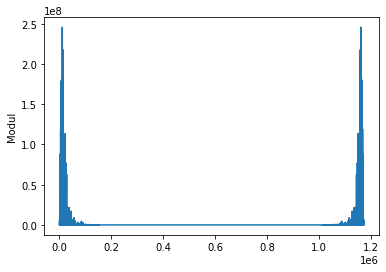

In [59]:
plt.figure()
plt.plot(np.abs(fast))
plt.ylabel("Modul")
plt.show()


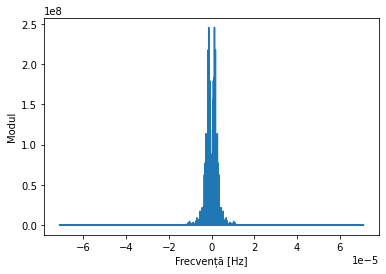

In [63]:
plt.figure()
plt.plot(6.278*xf, np.abs(fast))
plt.xlabel("Frecvență [Hz]")
plt.ylabel("Modul")
plt.show()

## Power Spectral Density (Putere-Frecventa)

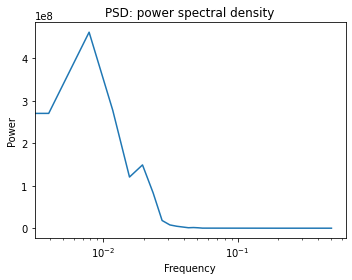

In [79]:
freqs, psd = signal.welch(first_channel)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

# Second Sample Spectogram and Frequency Analysis

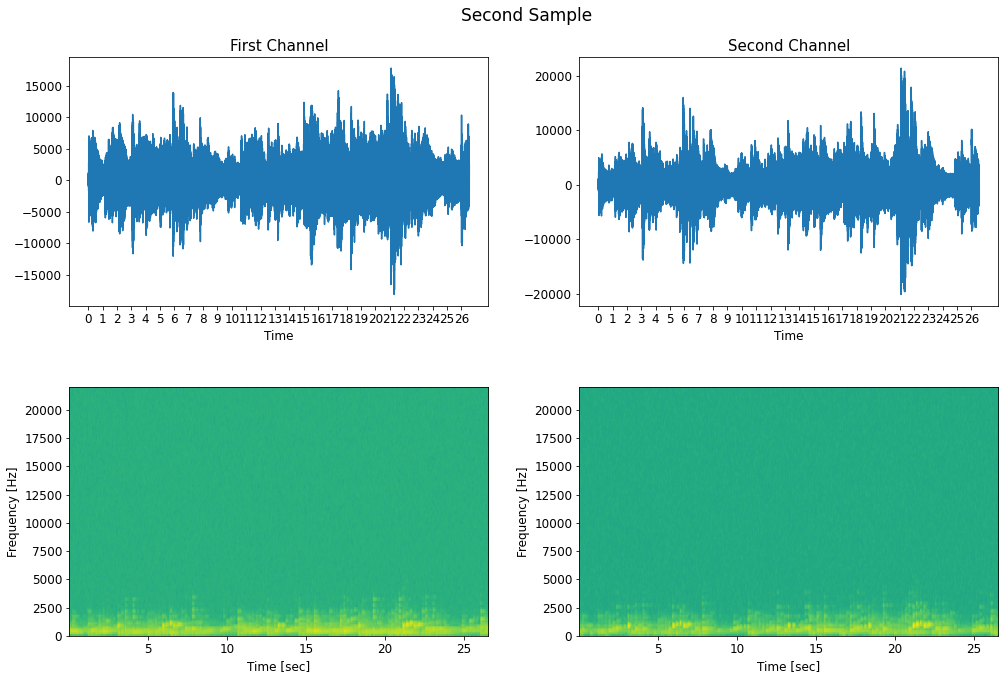

In [26]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
fig.tight_layout(pad=6.0)

fig.suptitle('Second Sample', size = 17)
ax[0, 0].plot(first_channel_noisy)
ax[0, 0].set_xticks(xticks_2)
ax[0, 0].set_xticklabels(np.arange(0, len(xticks_2), 1))
ax[0, 0].set_xlabel(xlabel='Time', size=12)
ax[0, 0].set_title("First Channel", fontsize=15)
ax[0, 0].tick_params(axis='both', which='both', labelsize=12)

ax[1, 0].specgram(first_channel_noisy, Fs=sample_rate)
ax[1, 0].set_xlabel(xlabel='Time [sec]', size=12)
ax[1, 0].set_ylabel(ylabel='Frequency [Hz]', size=12)
ax[1, 0].tick_params(axis='both', which='both', labelsize=12)

ax[0, 1].plot(second_channel_noisy)
ax[0, 1].set_xticks(xticks_1)
ax[0, 1].set_xticklabels(np.arange(0, len(xticks_1), 1))
ax[0, 1].set_xlabel(xlabel='Time', size=12)
ax[0, 1].set_title("Second Channel", fontsize=15)
ax[0, 1].tick_params(axis='both', which='both', labelsize=12)

ax[1, 1].specgram(second_channel_noisy, Fs=sample_rate)
ax[1, 1].set_xlabel(xlabel='Time [sec]', size=12)
ax[1, 1].set_ylabel(ylabel='Frequency [Hz]', size=12)
ax[1, 1].tick_params(axis='both', which='both', labelsize=12)
plt.show()